# Random Forest

Random Forest is a `supervised learning algorithm`. Like you can already see from it’s name, it creates a forest and makes it somehow random. `The „forest“ it builds, is an ensemble of Decision Trees`, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# load the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# encode features which are categorical or object using for loop
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


## Classification Model

In [12]:
# split the data into X and y for classification
X = df.drop('sex', axis = 1)
y = df['sex']
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# create, train and predict the mode
model_cl = RandomForestClassifier(random_state=42, 
                                  n_estimators=100, # n_estimators is optional. n_estimators is the number of trees in the forest
                                  min_samples_leaf=0.05 # min_samples_leaf is optional. min_samples_leaf is the minimum number of samples required to be at a leaf node
                                  ) 
model_cl.fit(X_train, y_train)
y_pred = model_cl.predict(X_test)

#evaluate the model
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

accuracy score:  0.6530612244897959
confusion matrix:
 [[ 5 14]
 [ 3 27]]
classification report:
               precision    recall  f1-score   support

           0       0.62      0.26      0.37        19
           1       0.66      0.90      0.76        30

    accuracy                           0.65        49
   macro avg       0.64      0.58      0.57        49
weighted avg       0.65      0.65      0.61        49



## Regression Model

In [13]:
# USe random Forest for Regression task
X = df.drop('tip', axis = 1)
y = df['tip']

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#create, train and predict the model
# model_reg = RandomForestRegressor() # could be used also without any parameters
model_reg = RandomForestRegressor(n_estimators=500, random_state=42)
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)

# evaluate the model
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

mean squared error:  0.9340836673959151
mean absolute error:  0.7683338775510192
r2 score:  0.25271593550646254
root mean squared error:  0.9664800398331644


## Fearure importance of RF regression algorithm

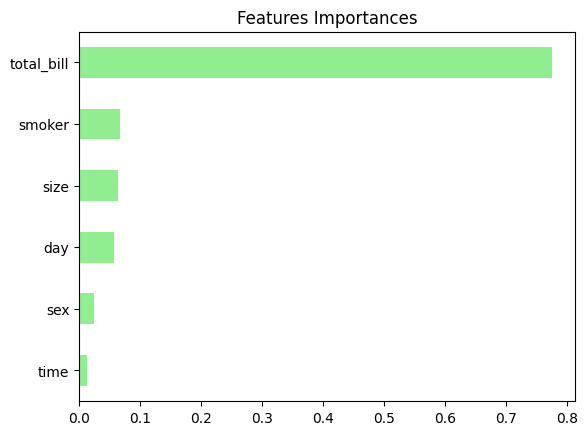

In [15]:
# Create a pd.Series of features importances
importances = pd.Series(data=model_reg.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()